Using TensorFlow backend.


XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTest shape =  <class 'numpy.ndarray'>
YTest shape =  <class 'numpy.ndarray'>
XTrain shape =  (60000, 28, 28)
XTest shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)
YTrain values =  [0 1 2 3 4 5 6 7 8 9]
YTest values =  [0 1 2 3 4 5 6 7 8 9]
YTrain distribution =  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
YTrain distribution =  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


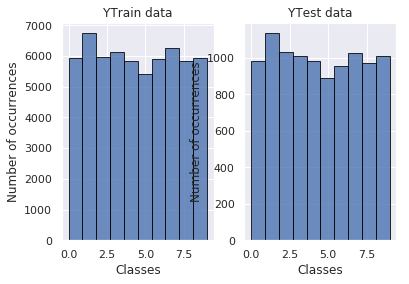

(60000, 784)
(10000, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.3550 - val_loss: 0.2719
Epoch 2/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.2656 - val_loss: 0.2557
Epoch 3/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.2460 - val_loss: 0.2337
Epoch 4/

60000/60000 [==============================] - 4s 59us/step - loss: 0.0986 - val_loss: 0.0969
Epoch 71/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0985 - val_loss: 0.0968
Epoch 72/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0984 - val_loss: 0.0967
Epoch 73/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0983 - val_loss: 0.0966
Epoch 74/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0982 - val_loss: 0.0965
Epoch 75/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0981 - val_loss: 0.0965
Epoch 76/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0980 - val_loss: 0.0964
Epoch 77/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0979 - val_loss: 0.0963
Epoch 78/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0979 - val_loss: 0.0962
Epoch 79/100
60000/60000 [========================

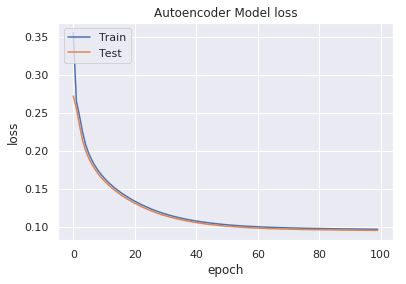

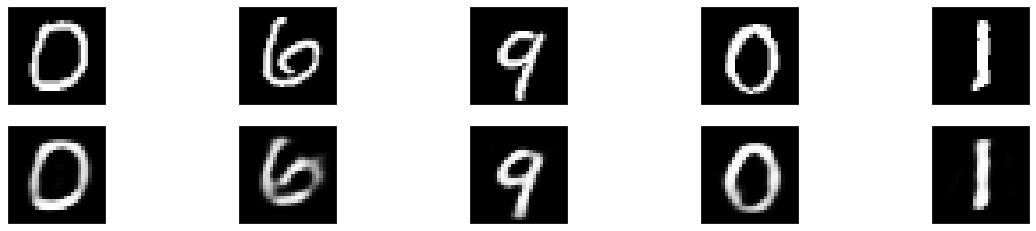

In [1]:
from keras.datasets import mnist

(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

print('XTrain class = ',type(XTrain))
print('YTrain class = ',type(YTrain))
print('XTest shape = ',type(XTest))
print('YTest shape = ',type(YTest))

print('XTrain shape = ',XTrain.shape)
print('XTest shape = ',XTest.shape)
print('YTrain shape = ',YTrain.shape)
print('YTest shape = ',YTest.shape)

import numpy as np
print('YTrain values = ',np.unique(YTrain))
print('YTest values = ',np.unique(YTest))

unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(1)
plt.subplot(121)
plt.hist(YTrain, alpha=0.8, ec='black')
plt.xlabel("Classes")
plt.ylabel("Number of occurrences")
plt.title("YTrain data")

plt.subplot(122)
plt.hist(YTest, alpha=0.8, ec='black')
plt.xlabel("Classes")
plt.ylabel("Number of occurrences")
plt.title("YTest data")
plt.show()


XTrain = XTrain.astype('float32') / 255
XTest = XTest.astype('float32') / 255

XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

print (XTrain.shape)
print (XTest.shape)

from keras.layers import Input 
from keras.layers import Dense
from keras.models import Model

InputModel = Input(shape=(784,))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(784, activation='sigmoid')(EncodedLayer)

AutoencoderModel = Model(InputModel, DecodedLayer)

AutoencoderModel.summary()

AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

history = AutoencoderModel.fit(XTrain, XTrain,
                    batch_size=256,
                    epochs=100,
                    shuffle=True,
                    validation_data=(XTest, XTest))

DecodedDigits = AutoencoderModel.predict(XTest)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

n=5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(DecodedDigits[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()